# Variance of Jarzynski estimator for Rabi Hamiltonian

In [1]:
# Frount matter
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle

#If your screen has retina display this will increase resolution of plots
%config InlineBackend.figure_format = 'retina'

# Read data
with open("psi.pickle", "rb") as f0:
    psi = pickle.load(f0)
with open("E.pickle", "rb") as f1:
    E = pickle.load(f1)
with open("simulation.pickle", "rb") as f2:
    psit = pickle.load(f2)

In [2]:
# Basic constants and parameters
# grid points
N=2000

# spatial grid
XMin=-50
XMax=50
X=np.linspace(XMin, XMax, N)
X2=np.linspace(XMin, XMax, 2*N)

# momentum grid
P=(2*np.pi/(XMax-XMin))*np.concatenate((np.arange(0,N//2), np.arange(-N//2,0)))

# initial and final conditions
w0=0.35
w1=1

#define pauli matrixes
S0 = np.array([[1, 0], [0, 1]])
S1 = np.array([[0, 1], [1, 0]])
S3 = np.array([[1, 0], [0, -1]])

## Function defination

### Partition function
$\sum_{i=0}^n e^{-\beta E_i}$


In [3]:
def Z(w,a,b,n,beta):
    Z_0=0
    for v in range(n):
        energy = E[w, a, b][v]
        Z_0 += np.exp(-beta * energy)  
    return Z_0

### Helmholtz free energy difference $\Delta F$
$\Delta F=\frac{1}{\beta}\ln(\frac{Z_0}{Z_1})$

In [4]:
def delta_F(a,b,n,beta):
    delta_F_0=1/beta*math.log(Z(0,a,b,n,beta)/Z(1,a,b,n,beta))
    return delta_F_0

### Variance 

In [5]:
def var(a,b,n,tau,beta):
    Fm=0.0
    Sm=0.0
    Z0= Z(0,a,b,n,beta)
    DF= delta_F(a,b,n,beta)
    for i in range(n):
        for j in range(n):
            psi_t=psit[a,b,i,tau]
            psi1=psi[1,a,b][j]
            abs_dot=np.abs(np.dot(psi1,psi_t))**2
            Fm+=np.exp(-beta*E[1,a,b][j])*abs_dot/Z0
            Sm+=np.exp(-beta*(2*E[1,a,b][j]-E[0,a,b][i]))*abs_dot/Z0
    Var=Sm-Fm**2
    Var_dis=Var/np.exp(-2*beta*DF)
    return Var_dis

In [29]:
print(var(0.75,0.75,50,5,4))

15628416.467194684


## Results

### Different evolution time

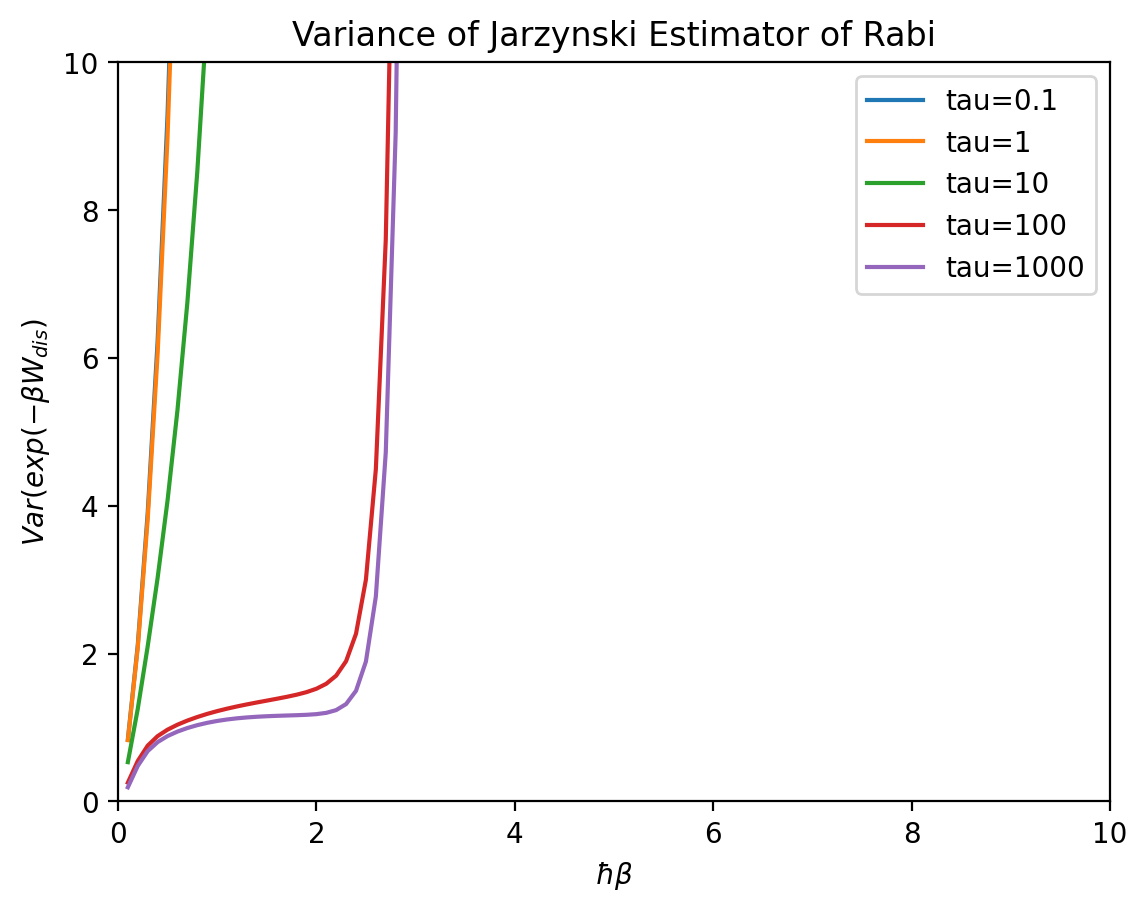

In [38]:
a = 1
b = 1
var_lists = []
taus = [0.1,1,10,100,1000]


for tau in taus:
    var_lists.append(var_list(a, b, 50, tau))
    plt.plot(beta_range, var_lists[-1], label=f'tau={tau}')

plt.xlabel(r'$ \hbar \beta$')
plt.ylabel(r'$Var(exp(-\beta W_{dis})$')
plt.title('Variance of Jarzynski Estimator of Rabi')
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.legend() 
plt.show()

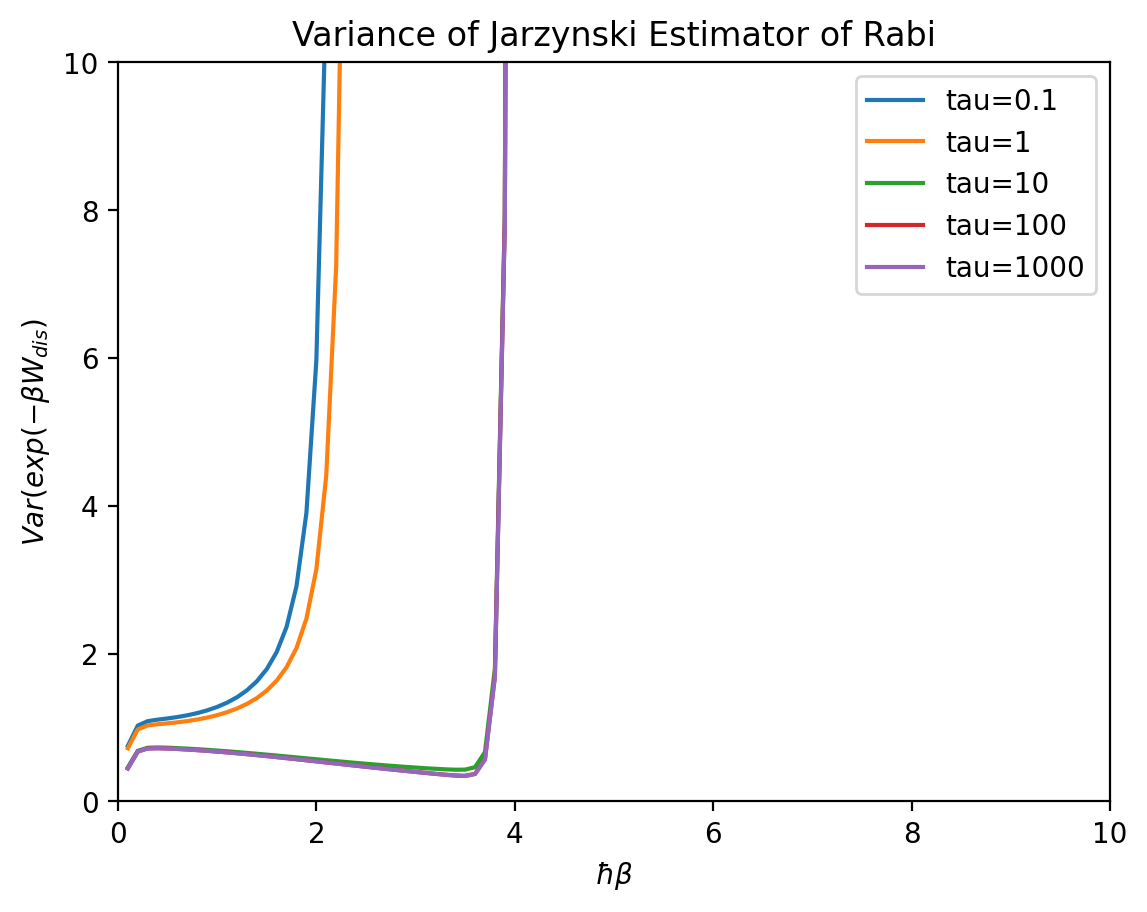

In [39]:
a = 0
b = 0
var_lists = []
taus = [0.1,1,10,100,1000]


for tau in taus:
    var_lists.append(var_list(a, b, 100,tau))
    plt.plot(beta_range, var_lists[-1], label=f'tau={tau}')

plt.xlabel(r'$ \hbar \beta$')
plt.ylabel(r'$Var(exp(-\beta W_{dis})$')
plt.title('Variance of Jarzynski Estimator of Rabi')
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.legend() 
plt.show()

### Different coupling strength

In [20]:
var_list_50= var(5,5,150,10,4)
print(var_list_50)

5.323672797185561e+58


In [55]:
k=40
print(var_list_50[k])
print(var_list_150[k])

0.0
1.168577841670492e+32


/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_8237/1667701517.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  delta_F_0=1/beta*math.log(Z(0,a,b,beta)/Z(1,a,b,beta))
/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_8237/469853297.py:16: RuntimeWarning: overflow encountered in scalar divide
  Var_dis=Var/np.exp(-2*beta*DF)
/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_8237/469853297.py:16: RuntimeWarning: invalid value encountered in scalar divide
  Var_dis=Var/np.exp(-2*beta*DF)
/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_8237/2644075803.py:5: RuntimeWarning: overflow encountered in exp
  Z_0 += np.exp(-beta * energy)
/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_8237/1667701517.py:2: RuntimeWarning: invalid value encountered in scalar divide
  delta_F_0=1/beta*math.log(Z(0,a,b,beta)/Z(1,a,b,beta))
/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_8237/469853297.py:16: RuntimeWarn

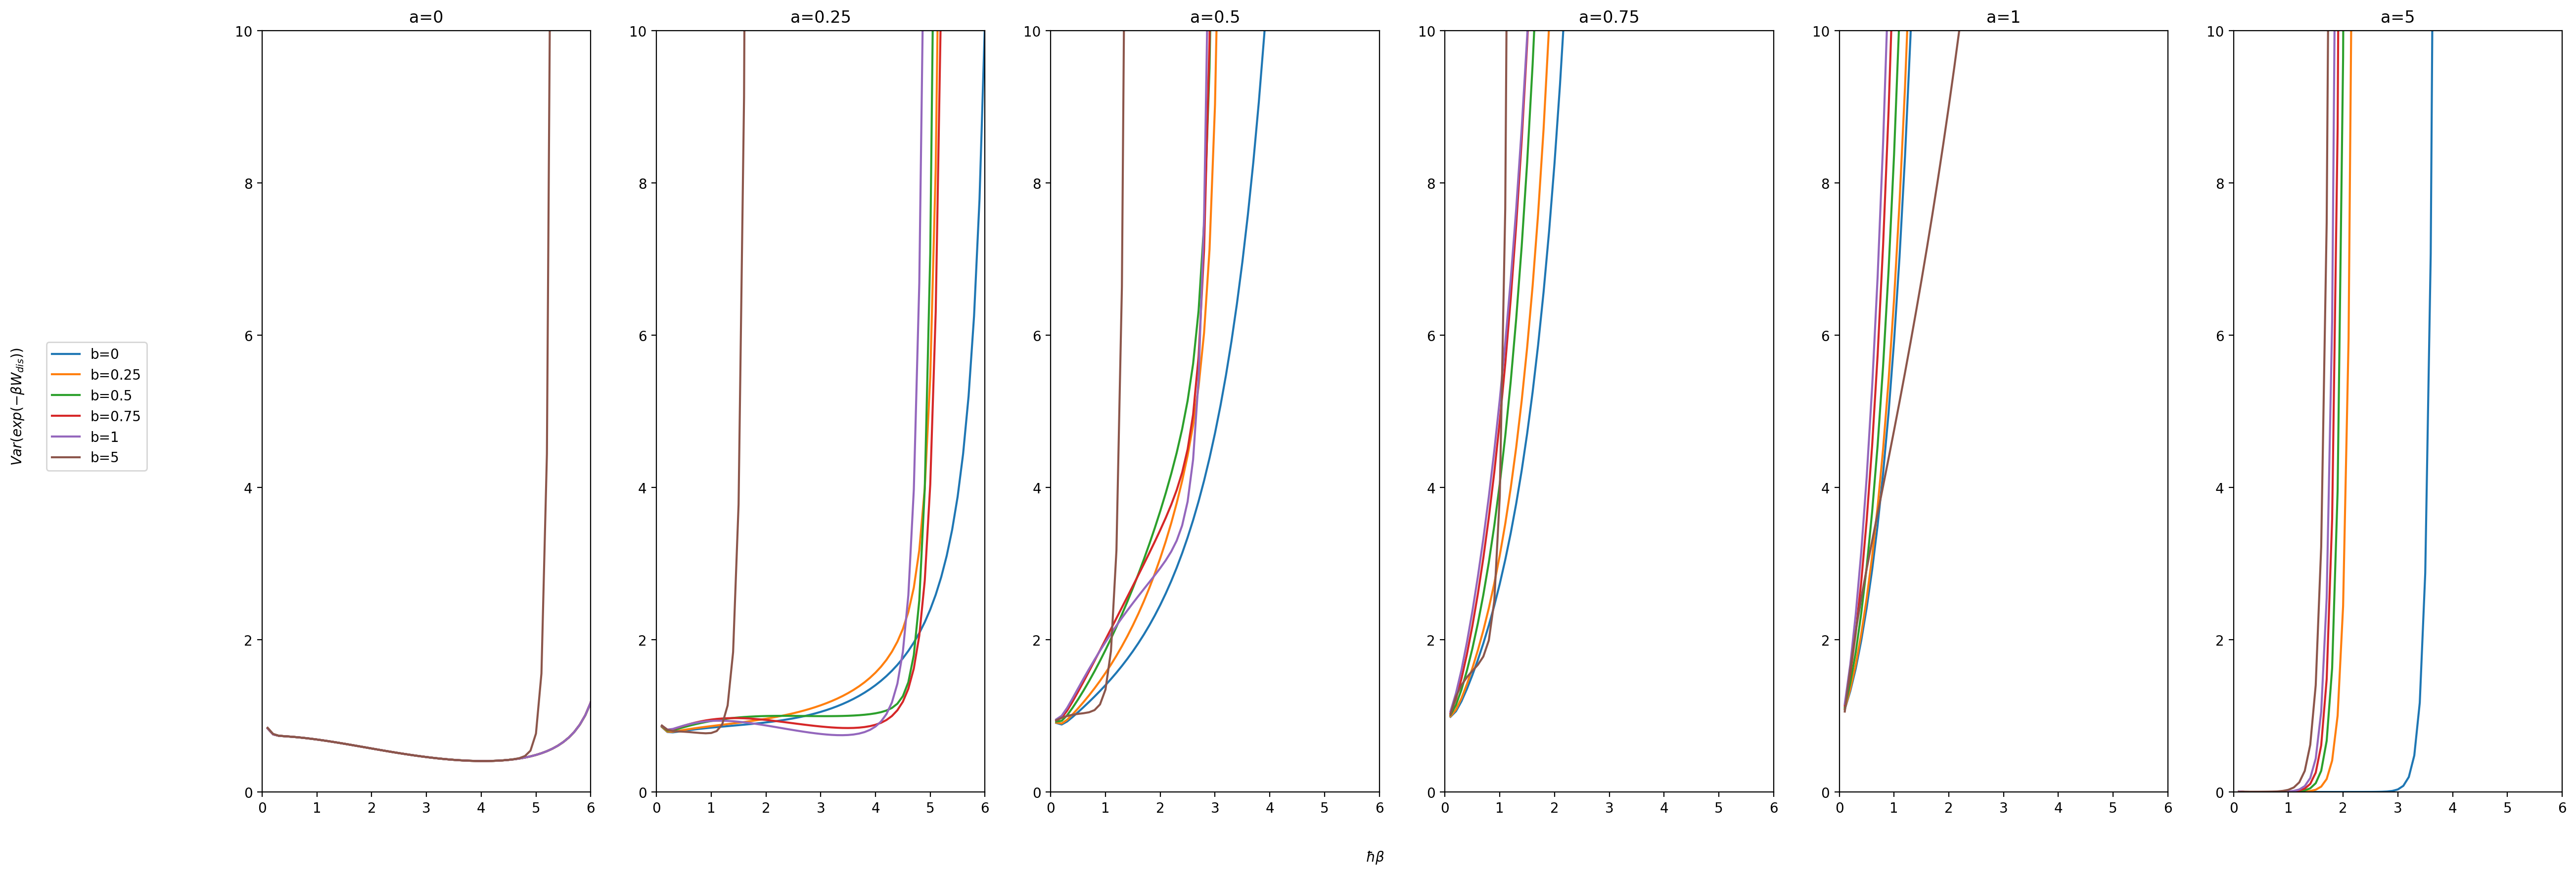

In [25]:
tau= 10
n=200
key_list=[0,0.25,0.5,0.75,1,5]
fig, axs = plt.subplots(nrows=1, ncols=len(key_list), figsize=(30, 10))

for i, a in enumerate(key_list):
    for j, b in enumerate(key_list):
        var_list_data = var_list(a, b, 50, tau)
        if i == 0:
            axs[i].plot(beta_range, var_list_data, label=f'b={b}')
        else:
            axs[i].plot(beta_range, var_list_data)
        axs[i].set_title(f'a={a}')
        axs[i].set_ylim(0, 10)
        axs[i].set_xlim(0, 6)

fig.text(0.5, 0.04, r'$\hbar \beta$', ha='center')
fig.text(0.04, 0.5, r'$Var(exp(-\beta W_{dis}))$', va='center', rotation='vertical')
fig.legend(loc='center left', bbox_to_anchor=(0.05, 0.5))

plt.show()

/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_5936/1667701517.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  delta_F_0=1/beta*math.log(Z(0,a,b,beta)/Z(1,a,b,beta))


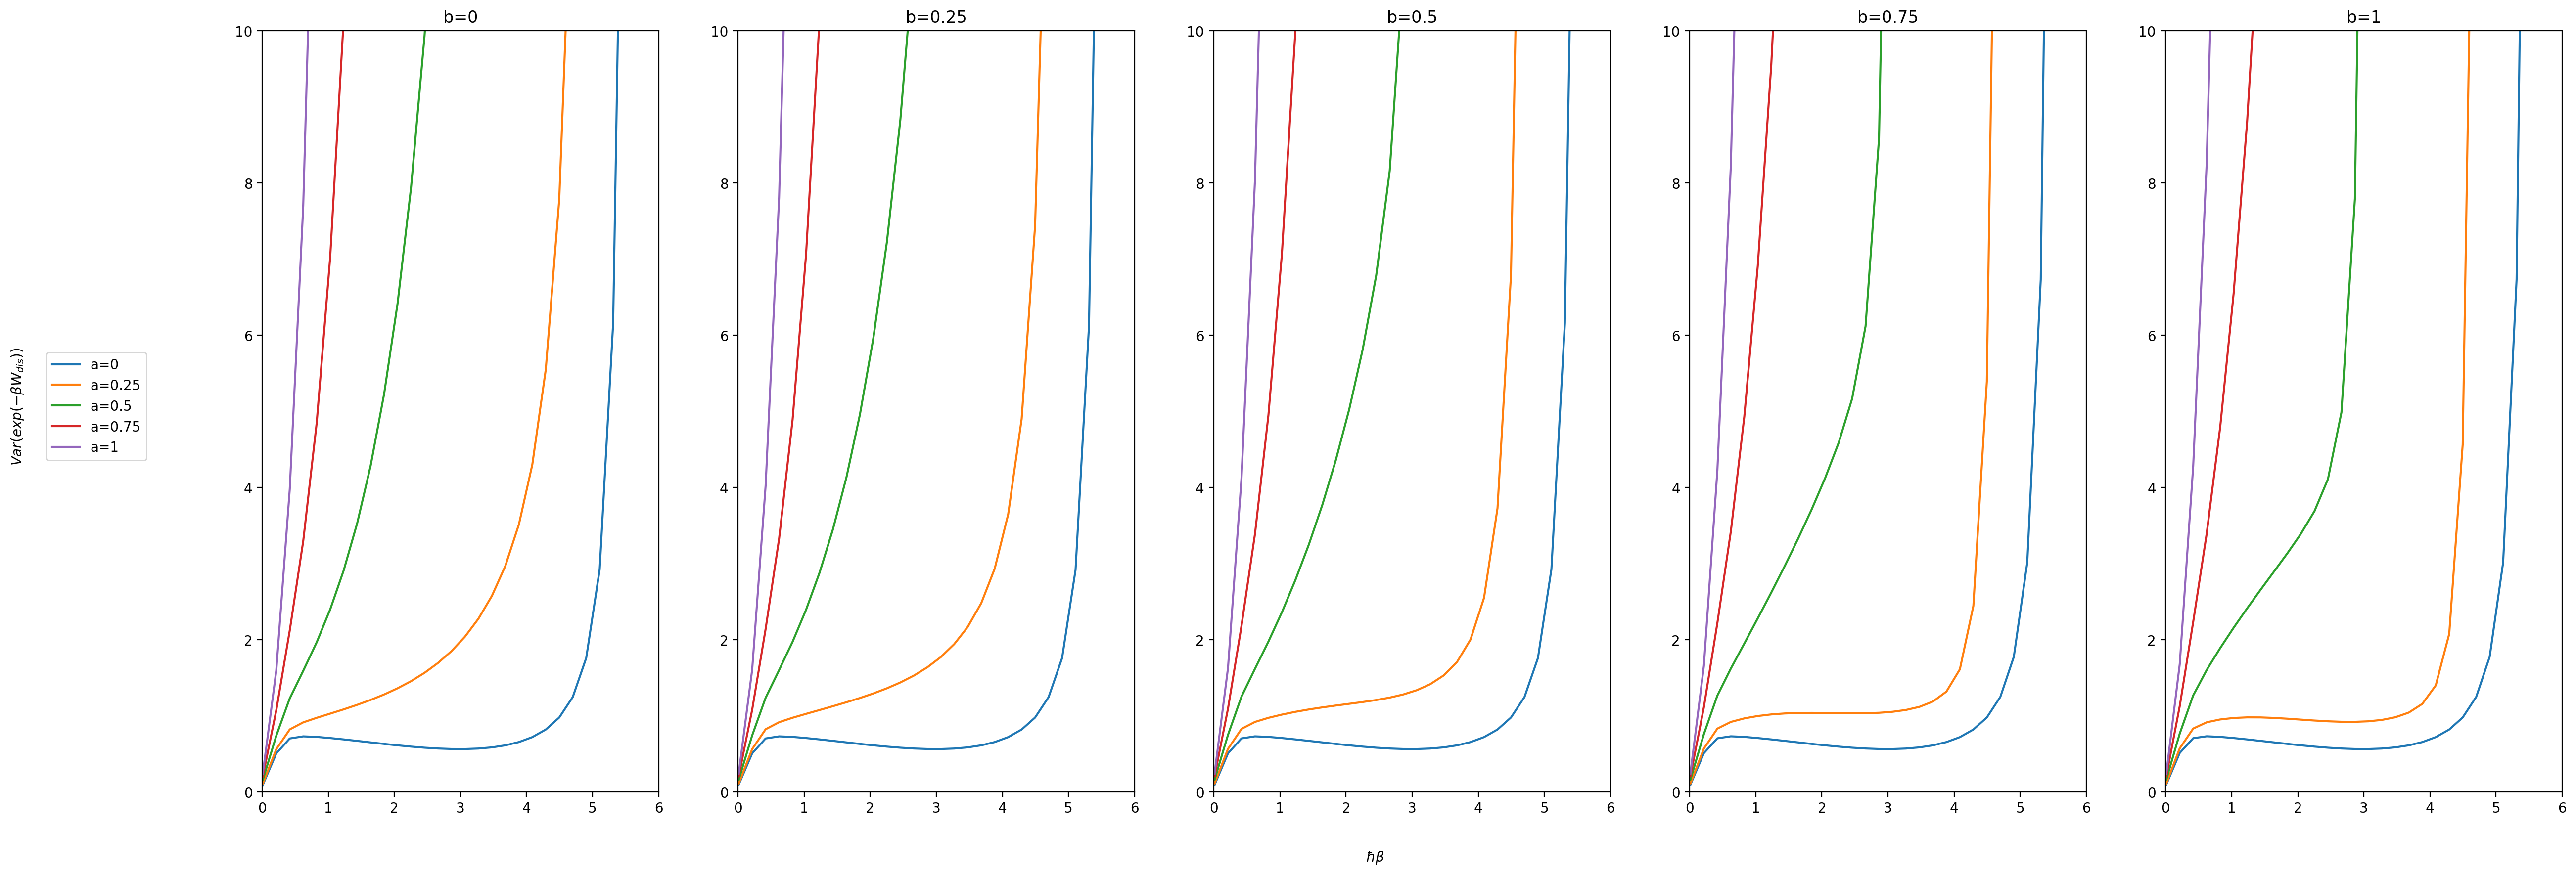

In [ ]:
tau= 1
b_s=[0,0.25,0.5,0.75,1]
fig, axs = plt.subplots(nrows=1, ncols=len(b_s), figsize=(30, 10))

for i, b in enumerate(b_s):
    for j, a in enumerate([0, 0.25, 0.5, 0.75, 1, 5]):
        var_list_data = var_list(a, b, tau)
        if i == 0:
            axs[i].plot(beta_range, var_list_data, label=f'a={a}')
        else:
            axs[i].plot(beta_range, var_list_data)
        axs[i].set_title(f'b={b}')
        axs[i].set_ylim(0, 10)
        axs[i].set_xlim(0, 6)

fig.text(0.5, 0.04, r'$\hbar \beta$', ha='center')
fig.text(0.04, 0.5, r'$Var(exp(-\beta W_{dis}))$', va='center', rotation='vertical')

fig.legend(loc='center left', bbox_to_anchor=(0.05, 0.5))
plt.show()